In [1]:
cd ../src

/home/sankha/Documents/programs/ML/densityNN/src


# Probabilistic Machine Learning

Going over the equations in Section 7.6.1 in the book _Machine Learning: A Proabbilistic Perspective_

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal

from lib.density.linearRegression import BayesianLR


In [3]:
blr = BayesianLR.BayesianLR_Normal(3, tau=3)
print(blr)

+----------------------------------------------------------------
| Bayesian Linear Regressor, Gaussian Prior, Gaussian Posterior  
+----------------------------------------------------------------
| w = [0. 0. 0.]
| V = [[3. 0. 0.]
|      [0. 3. 0.]
|      [0. 0. 3.]]
+----------------------------------------------------------------



## 1. Generating Data

Data is assumed to be modeled by kernel functions. A kernel function is something that takes parameters and an input and produces a reuslt. Something like the following:

$$y_{\phi_1} = \phi_1(t)$$

It is possible that that initial data ba modeled using a series if such functions $\phi_1, \phi_2, \cdots \phi_m$ such that the output is given by the following:

$$y = \Sigma_i w_i \phi_i(t) $$

In the following example, we will have a particularly simple implementation of the kernels in the form of powers such that, $\phi_i(t) = t^i$. Under such circumstances, the final form of of our equation can be represented as:

$$ y = \Sigma_{i=0}^2 w_i t^i $$

### 1.1. The Real Data

We wish to estimate the actual function i.e. the actual values of the weights $w_i$ based upon noisy samples from the real data. We shall assume that the real weights are known and are equal to $\mathbf {w}_{Real} = [-1, -3, 4]^\top$. Here $^{\top}$ is the transpose operator.

In [4]:
N = 1000
t = np.linspace(-20, 20, N)
X = np.vstack((np.ones(N), t, t**2)).T

wReal = np.array([-1, -3, 4])
y = X @ wReal

### 1.2. Data Samples

Data Samples are generated using the following function.

In [5]:
def generateSamples(Nsample, wReal, Nscale=1, Ncenter=0, noiseSigma=3):
    
    tSample = Nscale*(np.random.rand(Nsample) - 0.5) + Ncenter
    XSample = np.array([[1, m, m**2] for m in tSample])
    ySample = XSample @ wReal + np.random.normal(0, noiseSigma, Nsample)
    
    return tSample, XSample, ySample

In [6]:
def plotResults(X, t, wReal, tSample, ySample, w, V, N=100):
    
    m = multivariate_normal(w.flatten(), V, 100)
    
    plt.figure(figsize=(10, 4))
    totalPlot = plt.subplot(1,2,1)
    partialPlot = plt.subplot(1,2,2)
    
    for m_t in m:
        yTemp = X @ m_t
        totalPlot.plot(t, yTemp, color='orange', alpha=0.2)
        partialPlot.plot(t, yTemp, color='orange', alpha=0.2)
        
    totalPlot.plot(t, y, color='k', lw=2)
    totalPlot.plot(tSample, ySample, 'o', mfc='None', mec='k', ms=10)
    
    partialPlot.plot(t, y, color='k', lw=2)
    partialPlot.plot(tSample, ySample, 'o', mfc='None', mec='k', ms=10)
    
    xScale = (tSample.max() - tSample.min())*0.1
    yScale = (ySample.max() - ySample.min())*0.1
    partialPlot.set_xlim([tSample.min()-xScale, tSample.max()+xScale])
    partialPlot.set_ylim([ySample.min()-yScale, ySample.max()+yScale])
    
    plt.show()
    plt.close()
        
    return

In [7]:
def updateVectors(w0, V0, sigma, XSample, ySample):
    
    ySample = ySample.reshape((-1,1))
    
    V0Inv = np.linalg.inv(V0)
    Vn =  sigma**2 * np.linalg.inv( sigma**2 * V0Inv + XSample.T @ XSample)
    wn = Vn @ V0Inv @ w0 + (1/sigma**2) * Vn @ XSample.T @ ySample
    
    return wn, Vn

## 2. Initial Approximation

The weights are modeled as a Gaussian Process ($\mathcal{GP}$) such that

$$ \mathbf w \sim \mathcal N (\mathbf w_\mu, \mathbf V) $$

Here, $\mathbf w_\mu$ is the mean, and $\mathbf V$ is the covariance matrix for the $\mathcal {GP}$.

Since we don't know the initial approximation, we shall assume simple approximations. For example, we can assume that the initial values of all the means are zero, while the covariane matrix is diagonal.

In [8]:
Tau   = 5
nW = len(wReal)
V0 = np.eye(nW)*Tau
w0 = np.zeros( len(wReal) ).reshape((-1, 1))

In [9]:
tSample, XSample, ySample = generateSamples(10, wReal, Nscale=2.5, Ncenter=0, noiseSigma=3)

This is the original distribution

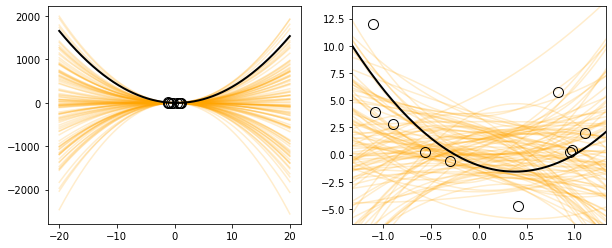

w.T = [[0. 0. 0.]]
V   = 
[[5. 0. 0.]
 [0. 5. 0.]
 [0. 0. 5.]]


In [10]:
plotResults(X, t, wReal, tSample, ySample, w0, V0, N=100)
print(f'w.T = {w0.T}')
print(f'V   = \n{V0}')

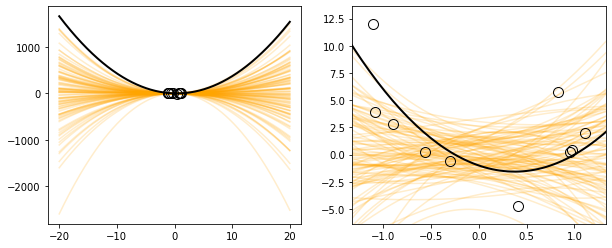

w.T = [0. 0. 0.]
V   = 
[[3. 0. 0.]
 [0. 3. 0.]
 [0. 0. 3.]]


In [11]:
plotResults(X, t, wReal, tSample, ySample, blr.w, blr.V, N=100)
print(f'w.T = {blr.w}')
print(f'V   = \n{blr.V}')

Given the samples, we can update the vectors.

In [12]:
sigma = 3
w1, V1 = updateVectors(w0, V0, sigma, XSample, ySample)

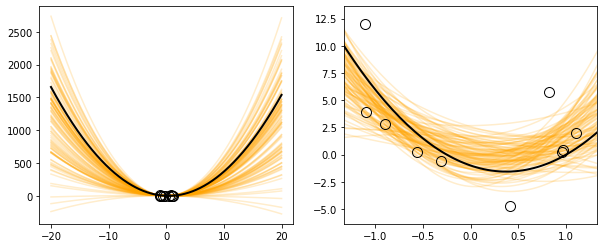

w.T = [[-0.10992385 -1.585173    3.14209326]]
V   = 
[[ 1.61376777e+00 -2.52351010e-02 -1.32791311e+00]
 [-2.52351010e-02  9.62665534e-01  7.96380916e-04]
 [-1.32791311e+00  7.96380916e-04  2.07350654e+00]]


In [13]:
plotResults(X, t, wReal, tSample, ySample, w1, V1, N=100)
print(f'w.T = {w1.T}')
print(f'V   = \n{V1}')

Done


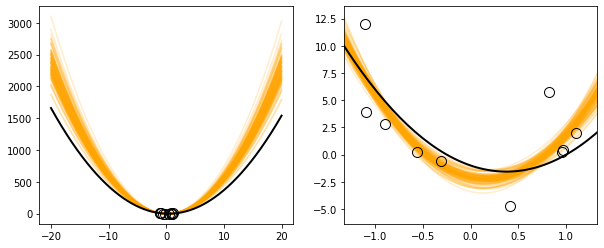

w.T = [[-2.14190702]
 [-1.90782434]
 [ 5.8650265 ]]
V   = 
[[ 0.1924583  -0.00280045 -0.19264836]
 [-0.00280045  0.06481861  0.00116803]
 [-0.19264836  0.00116803  0.25913485]]


In [17]:
blr.fit(XSample, ySample)
plotResults(X, t, wReal, tSample, ySample, blr.w, blr.V, N=100)
print(f'w.T = {blr.w}')
print(f'V   = \n{blr.V}')

In [18]:
tSample, XSample, ySample = generateSamples(10, wReal, Nscale=2.5, Ncenter=15, noiseSigma=3)

Let us repreat the whole process one more time ...

In [19]:
w2, V2 = updateVectors(w1, V1, sigma, XSample, ySample)

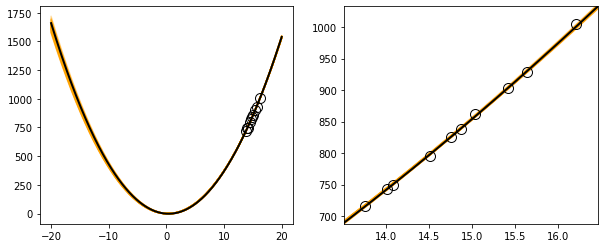

w.T = [[-0.69733384 -2.38669169  3.958383  ]]
V   = 
[[ 0.76196984 -0.02735304 -0.00160261]
 [-0.02735304  0.6072263  -0.04051653]
 [-0.00160261 -0.04051653  0.00273719]]


In [20]:
plotResults(X, t, wReal, tSample, ySample, w2, V2, N=100)
print(f'w.T = {w2.T}')
print(f'V   = \n{V2}')

Done


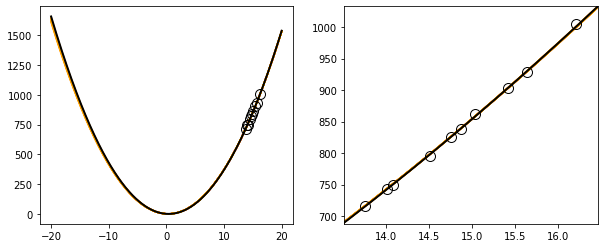

w.T = [[-0.7615285 ]
 [-2.43083757]
 [ 3.96164818]]
V   = 
[[ 0.04928385 -0.00077955 -0.00017065]
 [-0.00077955  0.04777547 -0.00319392]
 [-0.00017065 -0.00319392  0.00021657]]


In [21]:
blr.fit(XSample, ySample)
plotResults(X, t, wReal, tSample, ySample, blr.w, blr.V, N=100)
print(f'w.T = {blr.w}')
print(f'V   = \n{blr.V}')